In [1]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
csv = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_ids_outrigger_calculated_psi_unstranded.csv'

In [3]:
miso_calculated_psi = pd.read_csv(csv)
print(miso_calculated_psi.shape)
miso_calculated_psi.head()

(1807125, 5)


,sample_id,miso_id,outrigger_psi,notes_abbrev,notes
0,CVN_35,chr10:100150355:100150511:-@chr10:100148111:10...,NaN,Case 3,Case 3: All junctions with insufficient reads
1,CVN_17,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3,Case 3: All junctions with insufficient reads
2,CVN_35,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3,Case 3: All junctions with insufficient reads
3,M2nd_33,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3,Case 3: All junctions with insufficient reads
4,M2nd_34,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3,Case 3: All junctions with insufficient reads


In [4]:
miso_psi_filename = '/projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnms/splicing.csv.gz'
miso_psi = pd.read_csv(miso_psi_filename, index_col=0, compression='gzip')
print(miso_psi.shape)
miso_psi.head()

(275, 63201)


,chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,chr10:100150839:100150628|100150767:-@chr10:100150355:100150511:-,chr10:100170715:100170370|100170696:-@chr10:100167661:100167754:-,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,chr10:100185575:100185742:-@chr10:100185441|100185477:100185298:-,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,...,chrY:59222127:59222216|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222277|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,chrY:6780129:6780213:+@chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6889490:6889578:+@chrY:6893076:6893183:+@chrY:6911021:6911166:+,chrY:6931938:6932190:+@chrY:6934736:6934869:+@chrY:6938237:6938369:+,chrY:9236076-9236162:+@chrY:9236424-9236561:+,chrY:9365535-9365621:+@chrY:9365883-9366020:+
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.87,0.82,0.94,0.97,NaN,NaN,NaN,NaN,NaN,NaN
M1_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
miso_psi_min_cells = miso_psi.loc[:, miso_psi.notnull().sum() >= 10]
print(miso_psi_min_cells.shape)

(275, 41750)


In [6]:
miso_psi_tidy = miso_psi.unstack().reset_index()
miso_psi_tidy = miso_psi_tidy.rename(columns={'level_0':'miso_id', 'level_1':'sample_id', 0:'miso_psi'})
print(miso_psi_tidy.shape)
# miso_psi_tidy = miso_psi_tidy.dropna()
print(miso_psi_tidy.shape)
miso_psi_tidy.head()

(17380275, 3)
(17380275, 3)


,miso_id,sample_id,miso_psi
0,chr10:100148111:100148265:-@chr10:100147622:10...,M1_01,NaN
1,chr10:100148111:100148265:-@chr10:100147622:10...,M1_02,NaN
2,chr10:100148111:100148265:-@chr10:100147622:10...,M1_03,NaN
3,chr10:100148111:100148265:-@chr10:100147622:10...,M1_04,NaN
4,chr10:100148111:100148265:-@chr10:100147622:10...,M1_05,NaN


In [7]:
figure_folder = 'figures/015_compare_miso_vs_outrigger_psi_scatterplots_false_positive'
! mkdir -p $figure_folder

In [8]:
from __future__ import print_function

In [9]:
miso_calculated_psi.shape

(1807125, 5)

In [10]:
miso_psi_tidy.shape

(17380275, 3)

In [11]:
cols = ['miso_id', 'sample_id']

miso_psi_comparison = miso_psi_tidy.merge(miso_calculated_psi, left_on=cols, right_on=cols)
print(miso_psi_comparison.shape)
miso_psi_comparison.head()

(1806872, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3,Case 3: All junctions with insufficient reads
1,chr10:100174766:100174978:-@chr10:100174489:10...,M2nd_34,NaN,NaN,Case 3,Case 3: All junctions with insufficient reads
2,chr10:100174766:100174978:-@chr10:100174489:10...,M2nd_33,NaN,NaN,Case 3,Case 3: All junctions with insufficient reads
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3,Case 3: All junctions with insufficient reads
4,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_35,NaN,NaN,Case 3,Case 3: All junctions with insufficient reads


In [12]:
miso_psi_comparison_dropna = miso_psi_comparison.dropna(subset=['miso_psi', 'outrigger_psi'], how='all')
print(miso_psi_comparison_dropna.shape)
miso_psi_comparison_dropna.head()

(1347828, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3,Case 3: All junctions with insufficient reads
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3,Case 3: All junctions with insufficient reads
5,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4,Case 4: Only one junction with sufficient reads
6,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3,Case 3: All junctions with insufficient reads
7,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7,Case 7: Inclusion


In [13]:
len(miso_psi_comparison_dropna.groupby(['miso_id']).size())

35229

In [14]:
miso_psi_comparison_dropna.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads       27821
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       279
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   14
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                  9
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              107471
Case 2: Zero observed reads                                                                                                               3126
Case 3: All junctions with insufficient reads                                                                                           

In [15]:
miso_psi_comparison_dropna_min_cells = miso_psi_comparison_dropna.groupby('miso_id').filter(lambda x: len(x) >= 10)
print(miso_psi_comparison_dropna_min_cells.shape)
miso_psi_comparison_dropna_min_cells.head()

(1298728, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes
12,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_18,0.08,NaN,Case 3,Case 3: All junctions with insufficient reads
13,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_24,1.00,1.0,Case 7,Case 7: Inclusion
15,chr10:100190328:100190427:-@chr10:100189548:10...,P1_06,NaN,1.0,Case 7,Case 7: Inclusion
16,chr10:100190328:100190427:-@chr10:100189548:10...,P1_08,0.88,NaN,Case 4,Case 4: Only one junction with sufficient reads
18,chr10:100190328:100190427:-@chr10:100189548:10...,P1_10,0.03,0.0,Case 6,Case 6: Exclusion


In [16]:
len(miso_psi_comparison_dropna_min_cells.groupby('miso_id').size())

22168

In [17]:
miso_psi_comparison_dropna_min_cells.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads       27462
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       264
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   14
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                  9
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              104926
Case 2: Zero observed reads                                                                                                               2839
Case 3: All junctions with insufficient reads                                                                                           

In [18]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

In [19]:
miso_psi_comparison_dropna.shape

(1347828, 6)

In [20]:
miso_junction_reads2d = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_junction_reads2d.csv')
print(miso_junction_reads2d.shape)
miso_junction_reads2d.head()

(1926274, 9)


,sample_id,miso_id,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,CVN_35,chr10:100150355:100150511:-@chr10:100148111:10...,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,CVN_17,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,CVN_35,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,8.0,NaN,NaN,NaN,NaN,SE
3,M2nd_33,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,2.0,NaN,NaN,NaN,NaN,SE
4,M2nd_34,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,4.0,NaN,NaN,NaN,NaN,SE


In [21]:
cols = ['miso_id', 'sample_id']
miso_psi_comparison_dropna_junctions = miso_psi_comparison_dropna_min_cells.merge(miso_junction_reads2d, left_on=cols, right_on=cols)
print(miso_psi_comparison_dropna_junctions.shape)
miso_psi_comparison_dropna_junctions.head()

(1298643, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_18,0.08,NaN,Case 3,Case 3: All junctions with insufficient reads,NaN,8.0,NaN,NaN,NaN,NaN,SE
1,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_24,1.00,1.0,Case 7,Case 7: Inclusion,65.0,NaN,NaN,52.0,NaN,NaN,SE
2,chr10:100190328:100190427:-@chr10:100189548:10...,P1_06,NaN,1.0,Case 7,Case 7: Inclusion,12.0,NaN,NaN,11.0,NaN,NaN,SE
3,chr10:100190328:100190427:-@chr10:100189548:10...,P1_08,0.88,NaN,Case 4,Case 4: Only one junction with sufficient reads,22.0,NaN,NaN,NaN,NaN,NaN,SE
4,chr10:100190328:100190427:-@chr10:100189548:10...,P1_10,0.03,0.0,Case 6,Case 6: Exclusion,NaN,43.0,NaN,NaN,NaN,NaN,SE


In [22]:
miso_psi_comparison_dropna_junctions.to_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_psi_comparison_junction_reads2d.csv', 
                                            index=False)

In [23]:
miso_outrigger_psi_na = miso_psi_comparison_dropna_junctions.loc[miso_psi_comparison_dropna_junctions['outrigger_psi'].isnull()]
print(miso_outrigger_psi_na.shape)
miso_outrigger_psi_na.head()

(569101, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_18,0.08,NaN,Case 3,Case 3: All junctions with insufficient reads,NaN,8.0,NaN,NaN,NaN,NaN,SE
3,chr10:100190328:100190427:-@chr10:100189548:10...,P1_08,0.88,NaN,Case 4,Case 4: Only one junction with sufficient reads,22.0,NaN,NaN,NaN,NaN,NaN,SE
22,chr10:100190328:100190427:-@chr10:100189548:10...,CVN_17,0.92,NaN,Case 4,Case 4: Only one junction with sufficient reads,12.0,NaN,NaN,3.0,NaN,NaN,SE
24,chr10:100193697:100193848:-@chr10:100190888:10...,MSA_18,0.90,NaN,Case 3,Case 3: All junctions with insufficient reads,NaN,NaN,NaN,3.0,NaN,NaN,SE
25,chr10:100193697:100193848:-@chr10:100190888:10...,MSA_24,0.99,NaN,Case 4,Case 4: Only one junction with sufficient reads,NaN,NaN,NaN,47.0,NaN,NaN,SE


In [24]:
miso_false_positive_percent = 100 * float(miso_outrigger_psi_na.shape[0])/miso_psi_comparison_dropna_junctions['miso_psi'].notnull().sum()
miso_false_positive_percent

50.00505233782655

In [25]:
sns.set(context='paper', style='white')

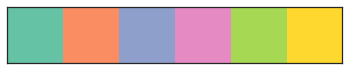

In [26]:
set2 = sns.color_palette('Set2')
sns.palplot(set2)
false_positive_color = set2[1]
false_negative_color = set2[0]

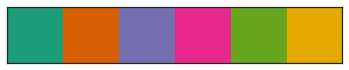

In [27]:
dark2 = sns.color_palette('Dark2')
sns.palplot(dark2)

false_positive_label = dark2[1]
false_negative_label = dark2[0]

In [28]:
miso_outrigger_psi_na.groupby('notes').size()

notes
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       264
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                  9
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              104926
Case 2: Zero observed reads                                                                                                               2839
Case 3: All junctions with insufficient reads                                                                                           116666
Case 4: Only one junction with sufficient reads                                                                                         303239
Case 5: Unequal read coverage (one side has at least 10x more reads)                                                                    

In [29]:
sns.set(context='paper', style='whitegrid')

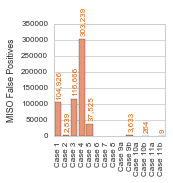

In [30]:
fig, ax = plt.subplots(figsize=(2, 2))

# outrigger_na_case_order = ['Case 3', 'Case 4', 'Case 6', 'Case 10b', 'Case 11b', 'Case 12b']

sns.countplot(x='notes_abbrev', data=miso_outrigger_psi_na, color=false_positive_color, order=case_order)

miso_outrigger_psi_na_sizes = miso_outrigger_psi_na.groupby('notes_abbrev').size()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
yoffset = 0.025 * ymax

for i, case in enumerate(case_order):
    if case in miso_outrigger_psi_na_sizes:
        y = miso_outrigger_psi_na_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_positive_label)
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set(xlabel='', ylabel='MISO False Positives')
fig.savefig('{}/outrigger_na_cases.pdf'.format(figure_folder))

In [31]:
pd.options.display.max_colwidth = 200

In [32]:
rows = miso_psi_comparison_dropna_junctions['miso_psi'].isnull() & miso_psi_comparison_dropna_junctions['outrigger_psi'].notnull()
miso_na_outrigger_psi = miso_psi_comparison_dropna_junctions.loc[rows]
print(miso_na_outrigger_psi.shape)
miso_na_outrigger_psi.head()

(160556, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
2,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P1_06,NaN,1.0,Case 7,Case 7: Inclusion,12.0,NaN,NaN,11.0,NaN,NaN,SE
8,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P2_11,NaN,0.0,Case 6,Case 6: Exclusion,NaN,123.0,NaN,NaN,NaN,NaN,SE
12,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P7_11,NaN,0.0,Case 6,Case 6: Exclusion,NaN,12.0,NaN,NaN,NaN,NaN,SE
17,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P4_01,NaN,0.0,Case 6,Case 6: Exclusion,NaN,29.0,NaN,NaN,NaN,NaN,SE
31,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,P2_10,NaN,1.0,Case 7,Case 7: Inclusion,228.0,NaN,NaN,300.0,NaN,NaN,SE


In [33]:
miso_na_outrigger_psi.tail()

,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
1298586,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,N1_11,NaN,1.0,Case 7,Case 7: Inclusion,412.0,NaN,NaN,349.0,NaN,NaN,SE
1298587,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,N2_02,NaN,1.0,Case 7,Case 7: Inclusion,21.0,NaN,NaN,24.0,NaN,NaN,SE
1298593,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,P2_02,NaN,1.0,Case 7,Case 7: Inclusion,17.0,NaN,NaN,13.0,NaN,NaN,SE
1298603,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,N4_05,NaN,1.0,Case 7,Case 7: Inclusion,11.0,NaN,NaN,17.0,NaN,NaN,SE
1298605,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,P3_01,NaN,1.0,Case 7,Case 7: Inclusion,78.0,NaN,NaN,75.0,NaN,NaN,SE


In [34]:
miso_na_outrigger_psi.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads     5614
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                 3
Case 6: Exclusion                                                                                                                     80699
Case 7: Inclusion                                                                                                                     60605
Case 8: Sufficient reads on all junctions                                                                                              6385
Case 9a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are sufficient junction reads     7250
dtype: int64

In [35]:
miso_na_outrigger_psi.query("notes == 'Case 8: Sufficient reads on all junctions'").shape

(6385, 13)

In [36]:
miso_false_negative_percent = 100 * float(miso_na_outrigger_psi.shape[0])/miso_psi_comparison_dropna['outrigger_psi'].notnull().sum()
miso_false_negative_percent

21.430783358961218

In [37]:
# fig, ax = plt.subplots(figsize=(2, 2))

# miso_na_case_order = ['Case 7', 'Case 8', 'Case 9', 'Case 10a', 'Case 11a', 'Case 12a']

# sns.countplot(x='notes_abbrev', data=miso_na_outrigger_psi, color=false_negative_color, order=case_order)

# miso_na_outrigger_psi_sizes = miso_na_outrigger_psi.groupby('notes_abbrev').size()
# ymin, ymax = ax.get_ylim()
# yrange = ymax - ymin
# yoffset = 0.025 * ymax

# for i, case in enumerate(case_order):
#     if case in miso_na_outrigger_psi_sizes:
#         y = miso_na_outrigger_psi_sizes[case]
#         ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
#                     va='bottom', ha='center', color=false_negative_label)
# plt.setp(ax.get_xticklabels(), rotation=90);
# ax.set(xlabel='', ylabel='MISO False Negatives')
# fig.savefig('{}/miso_na_cases.pdf'.format(figure_folder))

In [38]:
miso_na_outrigger_psi_sizes = miso_na_outrigger_psi.groupby('notes_abbrev').size()
miso_na_outrigger_psi_sizes

notes_abbrev
Case 10a     5614
Case 11a        3
Case 6      80699
Case 7      60605
Case 8       6385
Case 9a      7250
dtype: int64

In [39]:
miso_outrigger_psi_na_sizes

notes_abbrev
Case 1      104926
Case 10b       264
Case 11b         9
Case 2        2839
Case 3      116666
Case 4      303239
Case 5       37525
Case 9b       3633
dtype: int64

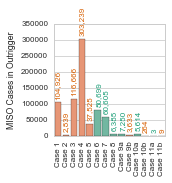

In [60]:
fig, ax = plt.subplots(figsize=(2, 2))

# outrigger_na_case_order = ['Case 3', 'Case 4', 'Case 6', 'Case 10b', 'Case 11b', 'Case 12b']

sns.countplot(x='notes_abbrev', data=miso_outrigger_psi_na, color=false_positive_color, order=case_order)
sns.countplot(x='notes_abbrev', data=miso_na_outrigger_psi, color=false_negative_color, order=case_order)

ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
yoffset = 0.025 * ymax


for i, case in enumerate(case_order):
    if case in miso_na_outrigger_psi_sizes:
        y = miso_na_outrigger_psi_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_negative_label)

for i, case in enumerate(case_order):
    if case in miso_outrigger_psi_na_sizes:
        y = miso_outrigger_psi_na_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.1, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_positive_label)
        
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set(xlabel='', ylabel='MISO Cases in Outrigger')
fig.savefig('{}/miso_outrigger_na_cases.pdf'.format(figure_folder))

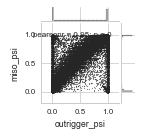

In [55]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_psi_comparison_dropna, color='#262626', 
                  joint_kws=dict(alpha=0.5, rasterized=True, s=1), size=2)
g.ax_joint.set(xticks=(0, 0.5, 1), yticks=(0, 0.5, 1))
g.savefig('{}/outrigger_vs_miso_psi_jointplot.pdf'.format(figure_folder), dpi=300)

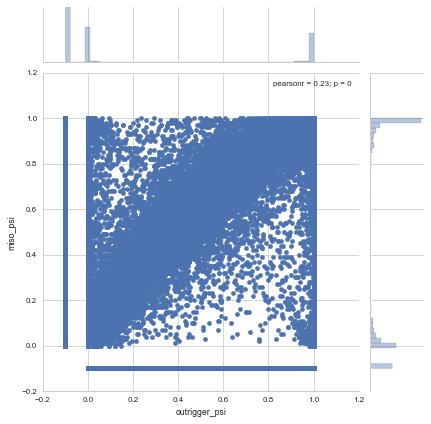

In [42]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_psi_comparison_dropna.fillna(-0.1))

## Use finer categories of NA

In [43]:
col = 'comparison_categories'

max_delta_psi = 0.2

miso_psi_comparison_dropna[col] = 'Other'
miso_psi_comparison_dropna.loc[miso_psi_comparison_dropna['miso_psi'].isnull() & miso_psi_comparison_dropna['outrigger_psi'].isnull(), col] = 'miso NA, outrigger NA'
miso_psi_comparison_dropna.loc[(miso_psi_comparison_dropna['miso_psi'] - miso_psi_comparison_dropna['outrigger_psi']).abs() <= max_delta_psi, col] = \
    'Within $|\Delta\Psi| \leq {}$'.format(max_delta_psi)
miso_psi_comparison_dropna.loc[miso_psi_comparison_dropna['miso_psi'].notnull() & miso_psi_comparison_dropna['outrigger_psi'].isnull(), col] = 'miso Psi, outrigger NA'
miso_psi_comparison_dropna.loc[miso_psi_comparison_dropna['miso_psi'].isnull() & miso_psi_comparison_dropna['outrigger_psi'].notnull(), col] = 'miso NA, outrigger Psi'
miso_psi_comparison_dropna.loc[(miso_psi_comparison_dropna['outrigger_psi'] == 0) & (miso_psi_comparison_dropna['miso_psi'] > max_delta_psi), col] = 'miso Psi, outrigger 0'
miso_psi_comparison_dropna.loc[(miso_psi_comparison_dropna['outrigger_psi'] == 1) & (miso_psi_comparison_dropna['miso_psi'] < (1 - max_delta_psi)), col] = 'miso Psi, outrigger 1'
category_sizes = miso_psi_comparison_dropna.groupby(col).size()
category_sizes

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


comparison_categories
Other                               5742
Within $|\Delta\Psi| \leq 0.2$    563150
miso NA, outrigger Psi            164977
miso Psi, outrigger 0               7312
miso Psi, outrigger 1               8003
miso Psi, outrigger NA            598644
dtype: int64

In [44]:
miso_psi_comparison_dropna_fillna = miso_psi_comparison_dropna.fillna(-0.1)
print(miso_psi_comparison_dropna_fillna.shape)
miso_psi_comparison_dropna_fillna.head()

(1347828, 7)


,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes,comparison_categories
0,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,CVN_35,0.15,-0.1,Case 3,Case 3: All junctions with insufficient reads,"miso Psi, outrigger NA"
3,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,CVN_17,0.09,-0.1,Case 3,Case 3: All junctions with insufficient reads,"miso Psi, outrigger NA"
5,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,M2_05,0.94,-0.1,Case 4,Case 4: Only one junction with sufficient reads,"miso Psi, outrigger NA"
6,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,MSA_31,0.85,-0.1,Case 3,Case 3: All junctions with insufficient reads,"miso Psi, outrigger NA"
7,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,P2_12,0.98,1.0,Case 7,Case 7: Inclusion,Within $|\Delta\Psi| \leq 0.2$


In [45]:
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

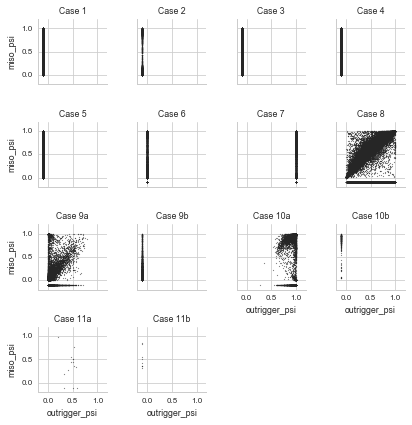

In [46]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', col_wrap=4, col_order=case_order, size=1.5)
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted.pdf'.format(figure_folder), dpi=300)

In [47]:
miso_psi_comparison_dropna_fillna['either_na'] = "True Positive"
miso_psi_comparison_dropna_fillna.loc[miso_psi_comparison_dropna['outrigger_psi'].isnull(), 'either_na'] = 'False Positive'
miso_psi_comparison_dropna_fillna.loc[miso_psi_comparison_dropna['miso_psi'].isnull(), 'either_na'] = 'False Negative'
miso_psi_comparison_dropna_fillna.head()

,miso_id,sample_id,miso_psi,outrigger_psi,notes_abbrev,notes,comparison_categories,either_na
0,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,CVN_35,0.15,-0.1,Case 3,Case 3: All junctions with insufficient reads,"miso Psi, outrigger NA",False Positive
3,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,CVN_17,0.09,-0.1,Case 3,Case 3: All junctions with insufficient reads,"miso Psi, outrigger NA",False Positive
5,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,M2_05,0.94,-0.1,Case 4,Case 4: Only one junction with sufficient reads,"miso Psi, outrigger NA",False Positive
6,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,MSA_31,0.85,-0.1,Case 3,Case 3: All junctions with insufficient reads,"miso Psi, outrigger NA",False Positive
7,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,P2_12,0.98,1.0,Case 7,Case 7: Inclusion,Within $|\Delta\Psi| \leq 0.2$,True Positive


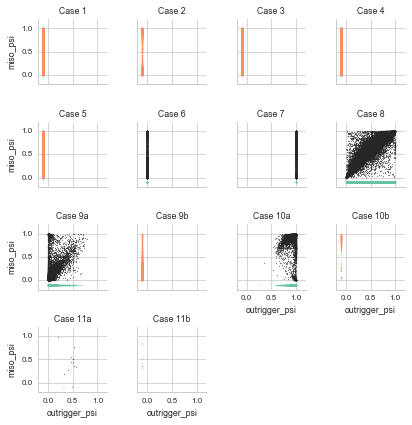

In [48]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', 
                  col_wrap=4, col_order=case_order, size=1.5, hue='either_na', 
                  hue_order=['False Positive', 'False Negative', 'True Positive'],
                  palette=[false_positive_color, false_negative_color, '#262626'])
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted_na_hue.pdf'.format(figure_folder), dpi=300)

In [49]:
not_within = [x for x in category_sizes.index if 'Within' not in x]
not_within

['Other',
 'miso NA, outrigger Psi',
 'miso Psi, outrigger 0',
 'miso Psi, outrigger 1',
 'miso Psi, outrigger NA']

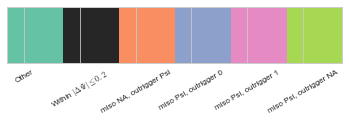

In [50]:
palette = dict(zip(not_within, map(mpl.colors.rgb2hex, sns.color_palette('Set2'))))
palette['Within $|\Delta\Psi| \leq 0.2$'] = '#262626'
palette_series = pd.Series(palette)
sns.palplot(palette_series)

ax = plt.gca()
ax.set(xticks=np.arange(len(palette_series))-0.2)
ax.set_xticklabels(palette_series.index, rotation=30)

In [51]:
category_percentages = 100 * category_sizes/category_sizes.sum()
category_percentages

comparison_categories
Other                              0.426019
Within $|\Delta\Psi| \leq 0.2$    41.782037
miso NA, outrigger Psi            12.240212
miso Psi, outrigger 0              0.542502
miso Psi, outrigger 1              0.593770
miso Psi, outrigger NA            44.415460
dtype: float64

In [52]:
outrigger_not_na = [x for x in category_sizes.index if 'outrigger NA' not in x]

category_sizes_percent_outrigger = 100 * category_sizes[outrigger_not_na]/miso_psi_comparison_dropna['outrigger_psi'].notnull().sum()
category_sizes_percent_outrigger.name = 'outrigger'
category_sizes_percent_outrigger

comparison_categories
Other                              0.766434
Within $|\Delta\Psi| \leq 0.2$    75.168450
miso NA, outrigger Psi            22.020892
miso Psi, outrigger 0              0.975995
miso Psi, outrigger 1              1.068229
Name: outrigger, dtype: float64

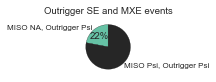

In [56]:
fig, ax = plt.subplots(figsize=(1, 1))
miso_na_percent = category_sizes_percent_outrigger['miso NA, outrigger Psi']
plt.pie([miso_na_percent, 100-miso_na_percent], startangle=90, 
        colors=[false_negative_color, '#262626'], 
        labels=['MISO NA, Outrigger Psi', 'MISO Psi, Outrigger Psi'], autopct='%.0f%%')
ax.set(title='Outrigger SE and MXE events')
fig.savefig('{}/miso_na_outrigger_psi_pie.pdf'.format(figure_folder))

In [57]:
miso_not_na = [x for x in category_sizes.index if 'miso NA' not in x]

category_sizes_percent_miso = 100 * category_sizes[miso_not_na]/miso_psi_comparison_dropna['miso_psi'].notnull().sum()
category_sizes_percent_miso.name = 'miso'
category_sizes_percent_miso

comparison_categories
Other                              0.485437
Within $|\Delta\Psi| \leq 0.2$    47.609547
miso Psi, outrigger 0              0.618167
miso Psi, outrigger 1              0.676586
miso Psi, outrigger NA            50.610263
Name: miso, dtype: float64

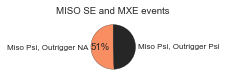

In [59]:
fig, ax = plt.subplots(figsize=(1, 1))
outrigger_na_percent = category_sizes_percent_miso['miso Psi, outrigger NA']


plt.pie([outrigger_na_percent, 100-outrigger_na_percent], startangle=90, 
        colors=[false_positive_color, '#262626'], 
        labels=['Miso Psi, Outrigger NA', 'Miso Psi, Outrigger Psi'], autopct='%.0f%%')
ax.set(title='MISO SE and MXE events')
fig.savefig('{}/miso_false_positives_pie.pdf'.format(figure_folder))

In [ ]:
category_percentages_df = category_sizes_percent_outrigger.to_frame().join(category_sizes_percent_miso, how='outer')
category_percentages_df

In [ ]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.heatmap(category_percentages_df, annot=True, vmin=0, vmax=100, cbar_kws=dict(label='% of dataset'))
fig.savefig('{}/comparison_categories_percentages_heatmap.pdf'.format(figure_folder))

### Barplot

In [ ]:
category_percentages_tidy = category_percentages.reset_index()
category_percentages_tidy = category_percentages_tidy.rename(columns={0: 'Percentage'})
category_percentages_tidy

In [ ]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(y='comparison_categories', x='Percentage', 
            data=category_percentages_tidy, palette=palette)
sns.despine()
ax.set(xlabel='Percentage')
xmin, xmax = ax.get_xlim()
x_value_range = xmax - xmin
xoffset = 0.025 * xmax

for i, (case, x) in enumerate(category_percentages.iteritems()):
#     x = category_sizes_not_both_na[case]
    coords = (x + xoffset, i+0.2)
    print(coords)
    ax.annotate("{:.2f}".format(x), coords, fontsize=8, 
                va='bottom', ha='left', color='black')

fig.savefig('{}/comparison_categories_percentages_barplots_fullsize.pdf'.format(figure_folder))


# ax.set(xlim=(0, 2))
# fig.savefig('{}/comparison_categories_percentages_barplots_zoomed.pdf'.format(figure_folder))

## Colored scatterplot

In [ ]:
vlim = (-0.15, 1.05)

In [ ]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna,
                  hue=col, palette=palette, 
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2, aspect=1.1)
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlim=vlim, ylim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_miso_psi.pdf'.format(figure_folder), dpi=300)

In [ ]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna,
                  hue=col, palette=palette, 
                  col='notes_abbrev', col_wrap=2,
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2, aspect=1.1)
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlim=vlim, ylim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_miso_psi_faceted_case.pdf'.format(figure_folder), dpi=300)